In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LSTM, Reshape, Dropout, LayerNormalization
from tensorflow.keras.models import Model, Sequential
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))

import pandas as pd

In [2]:
df = pd.read_csv('AIerror_allONU_15S_ID&Ai.csv', usecols=[1], engine='python')
df.head()

,Ai
0,8800
1,234
2,5814
3,25040
4,959


In [3]:
df = df.values
df = df.astype('float32')

In [4]:
df = df[:1000]
print(len(df))

1000


In [5]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(df)

In [6]:
# split into train and test sets
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

700 300


In [7]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [8]:
# reshape into X=t and Y=t+1
look_back = 32 #16
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [9]:
print(trainX.shape[0])
print(trainX.shape[1])

667
32


In [10]:
# reshape input to be [samples, time steps, features]
print(trainX.shape[1])
#trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
#testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
trainX = np.reshape(trainX, (trainX.shape[0], 32, 1)) #trainX.shape[1]
testX = np.reshape(testX, (testX.shape[0], 32, 1))
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

32
(667, 32, 1)
(667,)
(267, 32, 1)
(267,)


In [11]:
# create and fit the LSTM network
'''
model = Sequential()
#model.add(LSTM(40, input_shape=(1, look_back)))
model.add(LSTM(40, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=32, verbose=1) #64 & 128
'''
#timesteps_ = look_back

inputs = Input(shape=(look_back,))
#inputs = LayerNormalization(axis=1)(inputs)
tgt1 = tf.keras.layers.Reshape((look_back,1),input_shape=(look_back,))(inputs)

tgt1 = LSTM(units=40,return_sequences = True, input_shape=(look_back,1))(tgt1)
#tgt1 = Dropout(0.2)(tgt1)

tgt2 = LSTM(units=40,return_sequences = True)(tgt1)
#tgt2 = Dropout(0.2)(tgt2)

tgt3 = LSTM(units=40,return_sequences = True)(tgt2)
#tgt3 = Dropout(0.2)(tgt3)

tgt4 = LSTM(units=40)(tgt3)
#tgt4 = Dropout(0.2)(tgt4)

predictions = Dense(1)(tgt4)

model = Model(inputs=inputs, outputs=predictions)
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mse','mae'])

history = model.fit(trainX, trainY, epochs=100, batch_size=32, validation_split=0.3) #[1,0,0], [0,0,1]

Epoch 1/100
15/15 [==============================] - 1s 88ms/step - loss: 0.0062 - mse: 0.0062 - mae: 0.0368 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0282
Epoch 2/100
15/15 [==============================] - 0s 9ms/step - loss: 0.0062 - mse: 0.0062 - mae: 0.0323 - val_loss: 0.0030 - val_mse: 0.0030 - val_mae: 0.0295
Epoch 3/100
15/15 [==============================] - 0s 9ms/step - loss: 0.0060 - mse: 0.0060 - mae: 0.0315 - val_loss: 0.0031 - val_mse: 0.0031 - val_mae: 0.0299
Epoch 4/100
15/15 [==============================] - 0s 9ms/step - loss: 0.0060 - mse: 0.0060 - mae: 0.0316 - val_loss: 0.0031 - val_mse: 0.0031 - val_mae: 0.0300
Epoch 5/100
15/15 [==============================] - 0s 9ms/step - loss: 0.0060 - mse: 0.0060 - mae: 0.0322 - val_loss: 0.0030 - val_mse: 0.0030 - val_mae: 0.0282
Epoch 6/100
15/15 [==============================] - 0s 9ms/step - loss: 0.0060 - mse: 0.0060 - mae: 0.0318 - val_loss: 0.0030 - val_mse: 0.0030 - val_mae: 0.0288
Epoch 7/100
15/15 [==

15/15 [==============================] - 0s 9ms/step - loss: 0.0059 - mse: 0.0059 - mae: 0.0325 - val_loss: 0.0029 - val_mse: 0.0029 - val_mae: 0.0285
Epoch 52/100
15/15 [==============================] - 0s 9ms/step - loss: 0.0059 - mse: 0.0059 - mae: 0.0315 - val_loss: 0.0029 - val_mse: 0.0029 - val_mae: 0.0317
Epoch 53/100
15/15 [==============================] - 0s 9ms/step - loss: 0.0059 - mse: 0.0059 - mae: 0.0310 - val_loss: 0.0027 - val_mse: 0.0027 - val_mae: 0.0279
Epoch 54/100
15/15 [==============================] - 0s 9ms/step - loss: 0.0058 - mse: 0.0058 - mae: 0.0313 - val_loss: 0.0026 - val_mse: 0.0026 - val_mae: 0.0291
Epoch 55/100
15/15 [==============================] - 0s 9ms/step - loss: 0.0059 - mse: 0.0059 - mae: 0.0333 - val_loss: 0.0017 - val_mse: 0.0017 - val_mae: 0.0268
Epoch 56/100
15/15 [==============================] - 0s 9ms/step - loss: 0.0062 - mse: 0.0062 - mae: 0.0352 - val_loss: 0.0027 - val_mse: 0.0027 - val_mae: 0.0296
Epoch 57/100
15/15 [=========

look_back = 32, timesteps = 32, feature = 1

In [12]:
#batch_size = 64
from sklearn.metrics import mean_squared_error as mse
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mse(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mse(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# calculate root mean absolute error
trainScore2 = math.sqrt(mae(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMAE' % (trainScore2))
testScore2 = math.sqrt(mae(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMAE' % (testScore2))

Train Score: 28933.56 RMSE
Test Score: 15974.32 RMSE
Train Score: 122.33 RMAE
Test Score: 115.41 RMAE


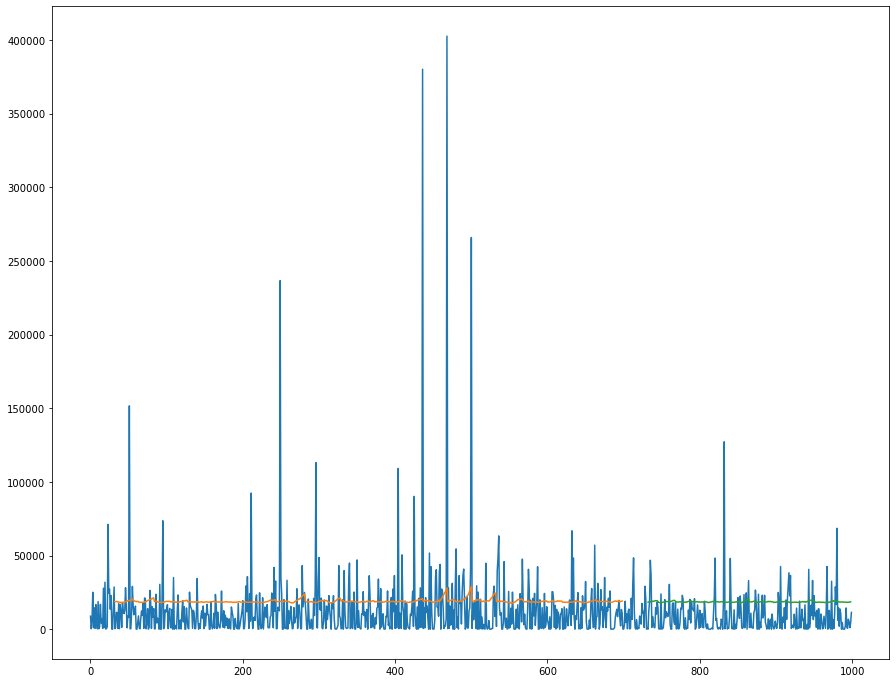

In [13]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(15, 12))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [14]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32)]              0         
_________________________________________________________________
reshape (Reshape)            (None, 32, 1)             0         
_________________________________________________________________
lstm (LSTM)                  (None, 32, 40)            6720      
_________________________________________________________________
lstm_1 (LSTM)                (None, 32, 40)            12960     
_________________________________________________________________
lstm_2 (LSTM)                (None, 32, 40)            12960     
_________________________________________________________________
lstm_3 (LSTM)                (None, 40)                12960     
_________________________________________________________________
dense (Dense)                (None, 1)                

look_back = 5, timesteps = 5, feature = 1

In [12]:
#batch_size = 64
from sklearn.metrics import mean_squared_error as mse
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mse(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mse(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# calculate root mean absolute error
trainScore2 = math.sqrt(mae(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMAE' % (trainScore2))
testScore2 = math.sqrt(mae(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMAE' % (testScore2))

Train Score: 21104.14 RMSE
Test Score: 23779.90 RMSE
Train Score: 93.62 RMAE
Test Score: 99.04 RMAE


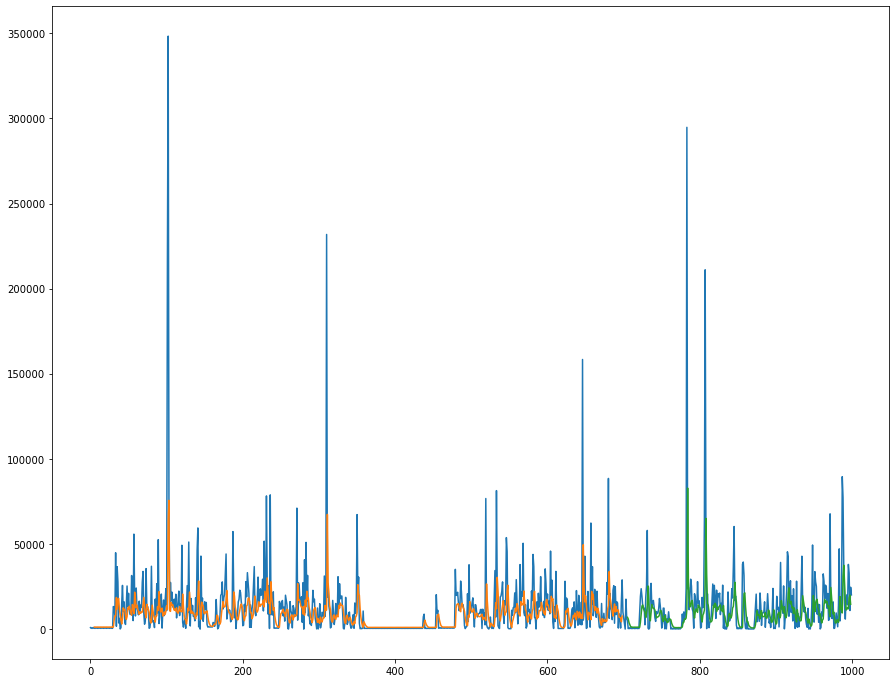

In [13]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(15, 12))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [14]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 5)]               0         
_________________________________________________________________
reshape (Reshape)            (None, 5, 1)              0         
_________________________________________________________________
lstm (LSTM)                  (None, 40)                6720      
_________________________________________________________________
dense (Dense)                (None, 1)                 41        
Total params: 6,761
Trainable params: 6,761
Non-trainable params: 0
_________________________________________________________________
